# HW 3 problem 1)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from glob import glob
# from scipy import optimize as opt
# from numba.decorators import jit
# from scipy.stats import chisquare

In [2]:
infile = './firas_monopole_spec_v1.txt'
ffreq, sspec, rresid, eerr, ggalpole = np.loadtxt(infile,unpack=True)

# Column 1 = frequency from Table 4 of Fixsen et al., units = cm^-1
# Column 2 = FIRAS monopole spectrum computed as the sum
#             of a 2.725 K BB spectrum and the
#             residual in column 3, units = MJy/sr
# Column 3 = residual monopole spectrum from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 4 = spectrum uncertainty (1-sigma) from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 5 = modeled Galaxy spectrum at the Galactic poles from Table 4 of
#             Fixsen et al., units = kJy/sr
#

### Define the constants and convert to cgs. Astropy.units waaaay too slow/cumbersome

In [3]:
h = 6.6260755e-27 # ergs/s
c = 2.99792e10 # cm/s
k = 1.38065e-16 #erg/k

# 1 Jy = 1e-23 erg/s cm^2 Hz = erg/s
freq = ffreq * c # cm / s
spec = sspec * 1e6 * 1e-23 # MJy -> erg/s
resid = rresid * 1e3 * 1e-23 # kJy -> erg/s
err = eerr * 1e3 * 1e-23 #kJy -> erg/s
galpole = ggalpole * 1e3 # kJy -> erg/s


In [4]:
# MB
T0 = 2.725 # K
mu0 = 4e-17 # erg
x = h * freq / (k * T0)
f0 = 2. * (h/c**2.)  * freq**3. / (np.exp(x - (mu0 / (k * T0))) - 1.)

### Make plot of original data to find suitable range of $\mu$ and T as to get reasonable answers

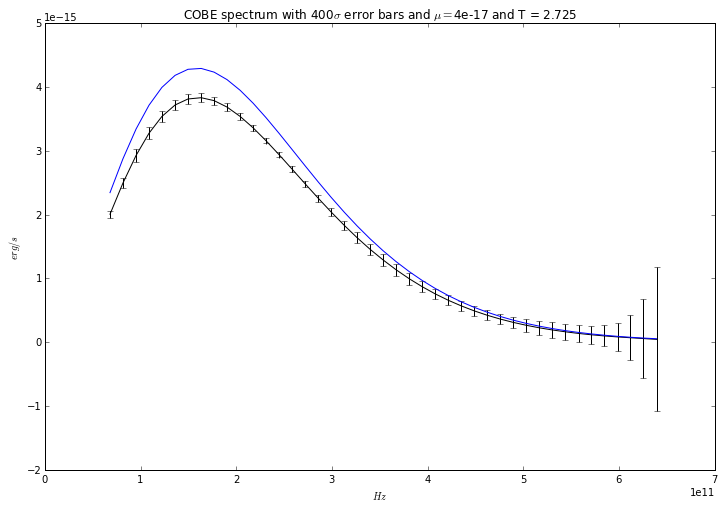

In [5]:
plt.figure(figsize=(12, 8))
plt.errorbar(freq, spec, xerr=0.0, yerr=err*400,color='k')
plt.plot(freq,f0)
plt.xlabel(r'$Hz$')
plt.ylabel(r'$erg / s$')
plt.title(r'COBE spectrum with 400$\sigma$ error bars and $\mu = ${} and T = {}'.format(mu0,T0))

###  Using a Bose-Einstein ideal gas as our model, vary T and $\mu$ and measure $\chi^{2}$ between the measured value and our model. 

In [10]:
npts = 1000
minT = 2.72
maxT = 2.73
minMu = -1 * 10**(-18)
maxMu = 1 * 10**(-18)

T = np.linspace(minT,maxT,npts)
mu = np.linspace(minMu,maxMu,npts)

tab_tmu = np.empty((npts,npts), dtype=float)
for i,t in enumerate(T):
    for j,m in enumerate(mu):
        x = h * freq / (k * t)
        model = 2. * (h / c**2.)  * freq**3. / (np.exp(x - (m / (k * t))) - 1.) 
        chi2 = np.sum(((model - spec)**2.) / err**2)
        tab_tmu[i][j] = chi2/(npts) # reduced chi2


###  find the maximum $\mu$:

In [7]:
Z = tab_tmu
select_2sigma = np.where(Z <= 6.18)
select_1sigma = np.where(Z <= 2.3)
max_mu_2 = mu[select_2sigma[0]].max()
max_mu_1 = mu[select_1sigma[0]].max()
print np.where(Z <= 2.3)
print('maximum mu at 2-sigma = {}'.format(max_mu_2))
print('maximum mu at 1-sigma = {}'.format(max_mu_1))

(array([387, 387, 387, ..., 613, 613, 613]), array([764, 765, 766, ..., 236, 237, 238]))
maximum mu at 2-sigma = 3.75375375375e-19
maximum mu at 1-sigma = 2.27227227227e-19


### make a contour plot

<a list of 6 text.Text objects>

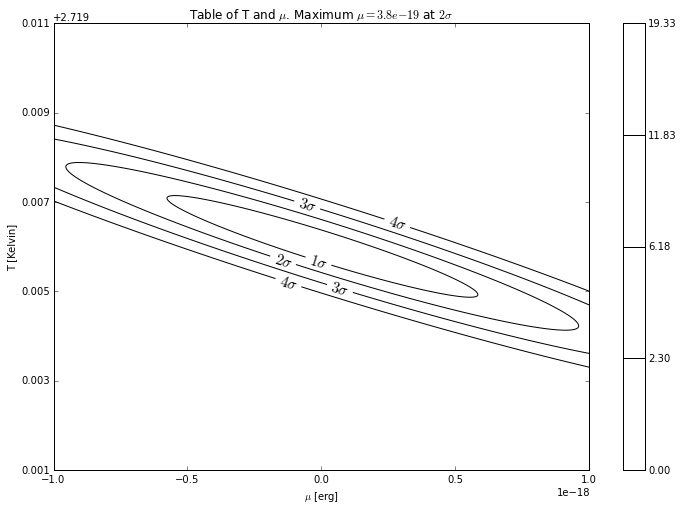

In [9]:
plt.figure(figsize=(12, 8))

levels = [0, 2.3, 6.18, 11.83, 19.33]
z_min = Z.min()
z_max = Z.max()

# CS1 = plt.pcolormesh(mu, T, Z, cmap='RdBu')
CS2 = plt.contour(mu, T, Z, levels, colors='black')


plt.colorbar()
plt.ylabel("T [Kelvin]")
plt.xlabel(r"$\mu$ [erg]")
plt.title(r'Table of T and $\mu$. Maximum $\mu = {0:.2g}$ at $2\sigma$'.format(max_mu_2))
keys = [r'$1\sigma$',r'$2\sigma$',r'$3\sigma$',r'$4\sigma$']
plt.clabel(CS2, inline=1, fontsize=15, fmt={0:'', 2.3:r'$1\sigma$', 
                                            6.18:r'$2\sigma$', 
                                            11.83:r'$3\sigma$', 
                                            19.33:r'$4\sigma$'})
